In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_curve, confusion_matrix, log_loss, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.impute import KNNImputer
from collections import Counter
from itertools import pairwise
from sklearn.model_selection import cross_validate
import tensorflow as tf
import matplotlib.cm as cm

C:\Users\215564\AppData\Local\Temp\1\ipykernel_8840\4002779807.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(context='notebook', palette='viridis')

In [3]:
df = pd.read_csv(
    "LSTM-Multivariate_pollution.csv")  # .drop(columns=["date"])
print(df.shape)
df.head()

(43800, 9)


,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       43800 non-null  datetime64[ns]
 1   pollution  43800 non-null  float64       
 2   dew        43800 non-null  int64         
 3   temp       43800 non-null  float64       
 4   press      43800 non-null  float64       
 5   wnd_dir    43800 non-null  object        
 6   wnd_spd    43800 non-null  float64       
 7   snow       43800 non-null  int64         
 8   rain       43800 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 3.0+ MB


In [6]:
df.describe()

,date,pollution,dew,temp,press,wnd_spd,snow,rain
count,43800,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,2012-07-02 11:30:00,94.013516,1.828516,12.459041,1016.447306,23.894307,0.052763,0.195023
min,2010-01-02 00:00:00,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,2011-04-03 05:45:00,24.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,2012-07-02 11:30:00,68.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,2013-10-01 17:15:00,132.250000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,2014-12-31 23:00:00,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000
std,NaN,92.252276,14.429326,12.193384,10.271411,50.022729,0.760582,1.416247


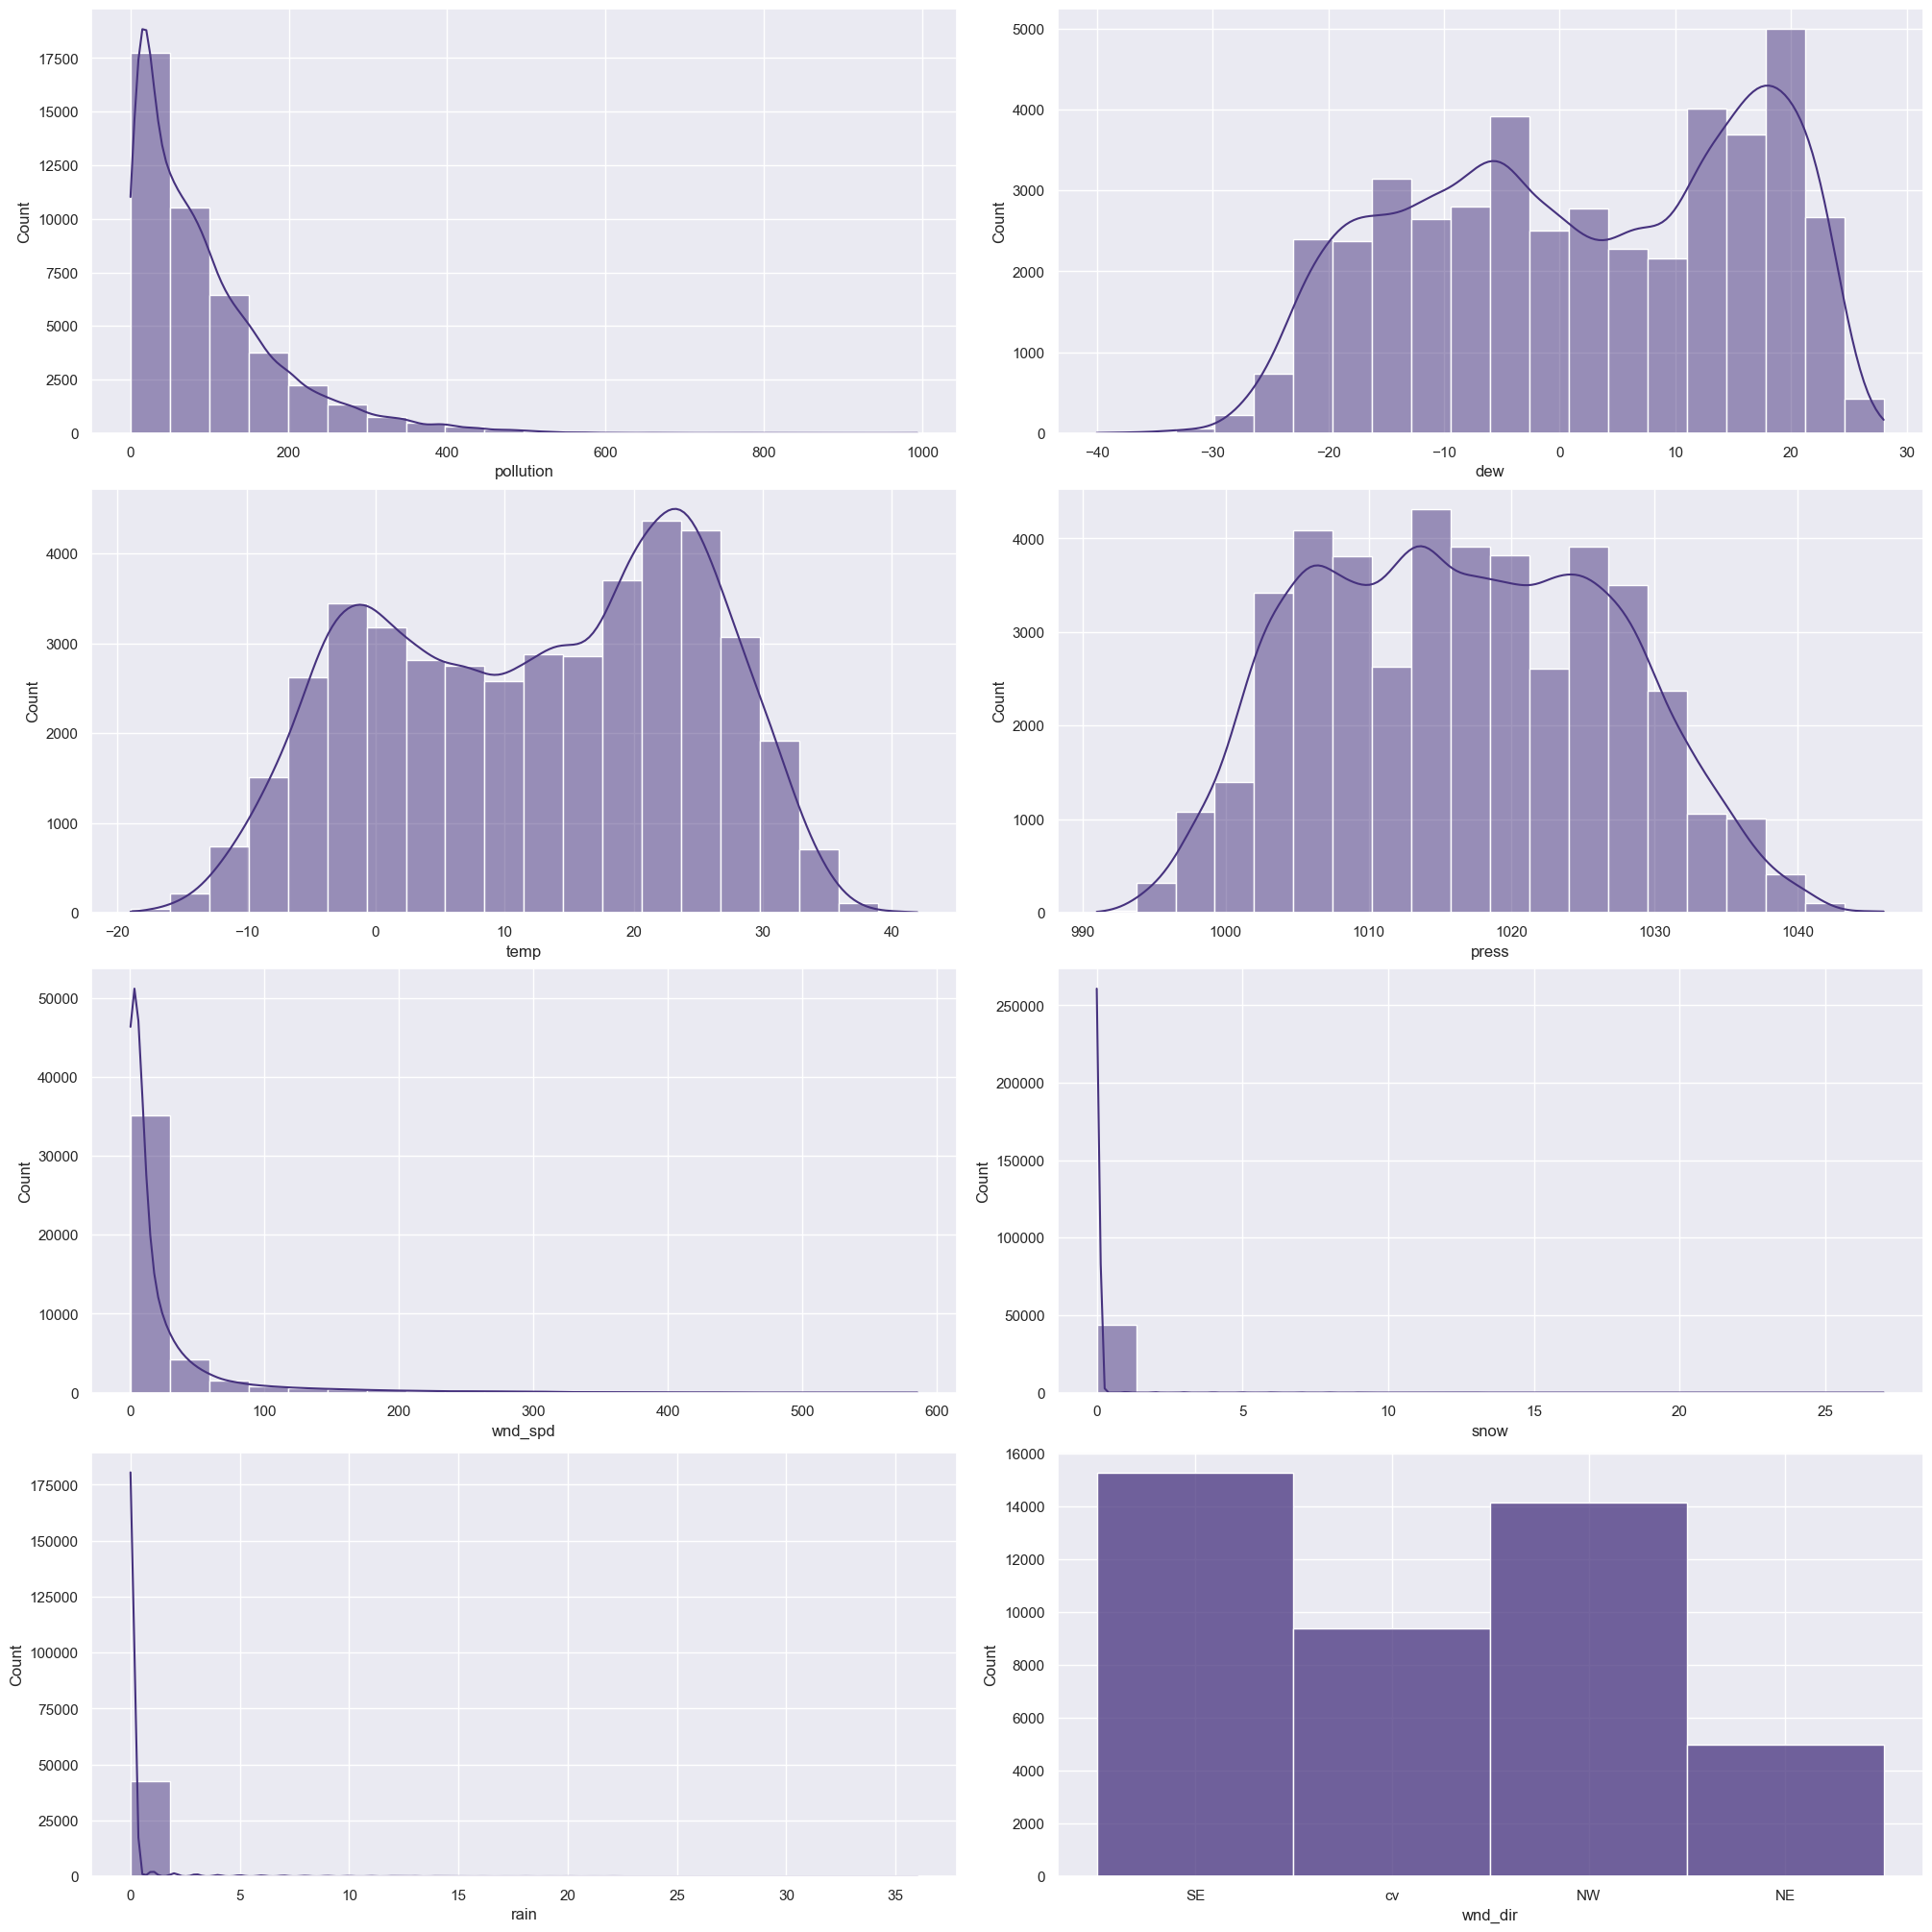

In [7]:
numerical = ['pollution',	'dew',	'temp',	'press', 'wnd_spd', 'snow', 'rain']
fig, axs = plt.subplots(4, 2,
                        figsize=(20, 20), constrained_layout=True)

for i, f in enumerate(numerical):
    sns.histplot(x=f, data=df,  kde=True,
                 ax=axs[i//2][i % 2], bins=20,
                 palette=sns.color_palette("viridis", 2))
sns.histplot(x='wnd_dir', data=df)

plt.show()

In [8]:
df['temp'].values

array([-4., -4., -5., ..., -3., -4., -3.])

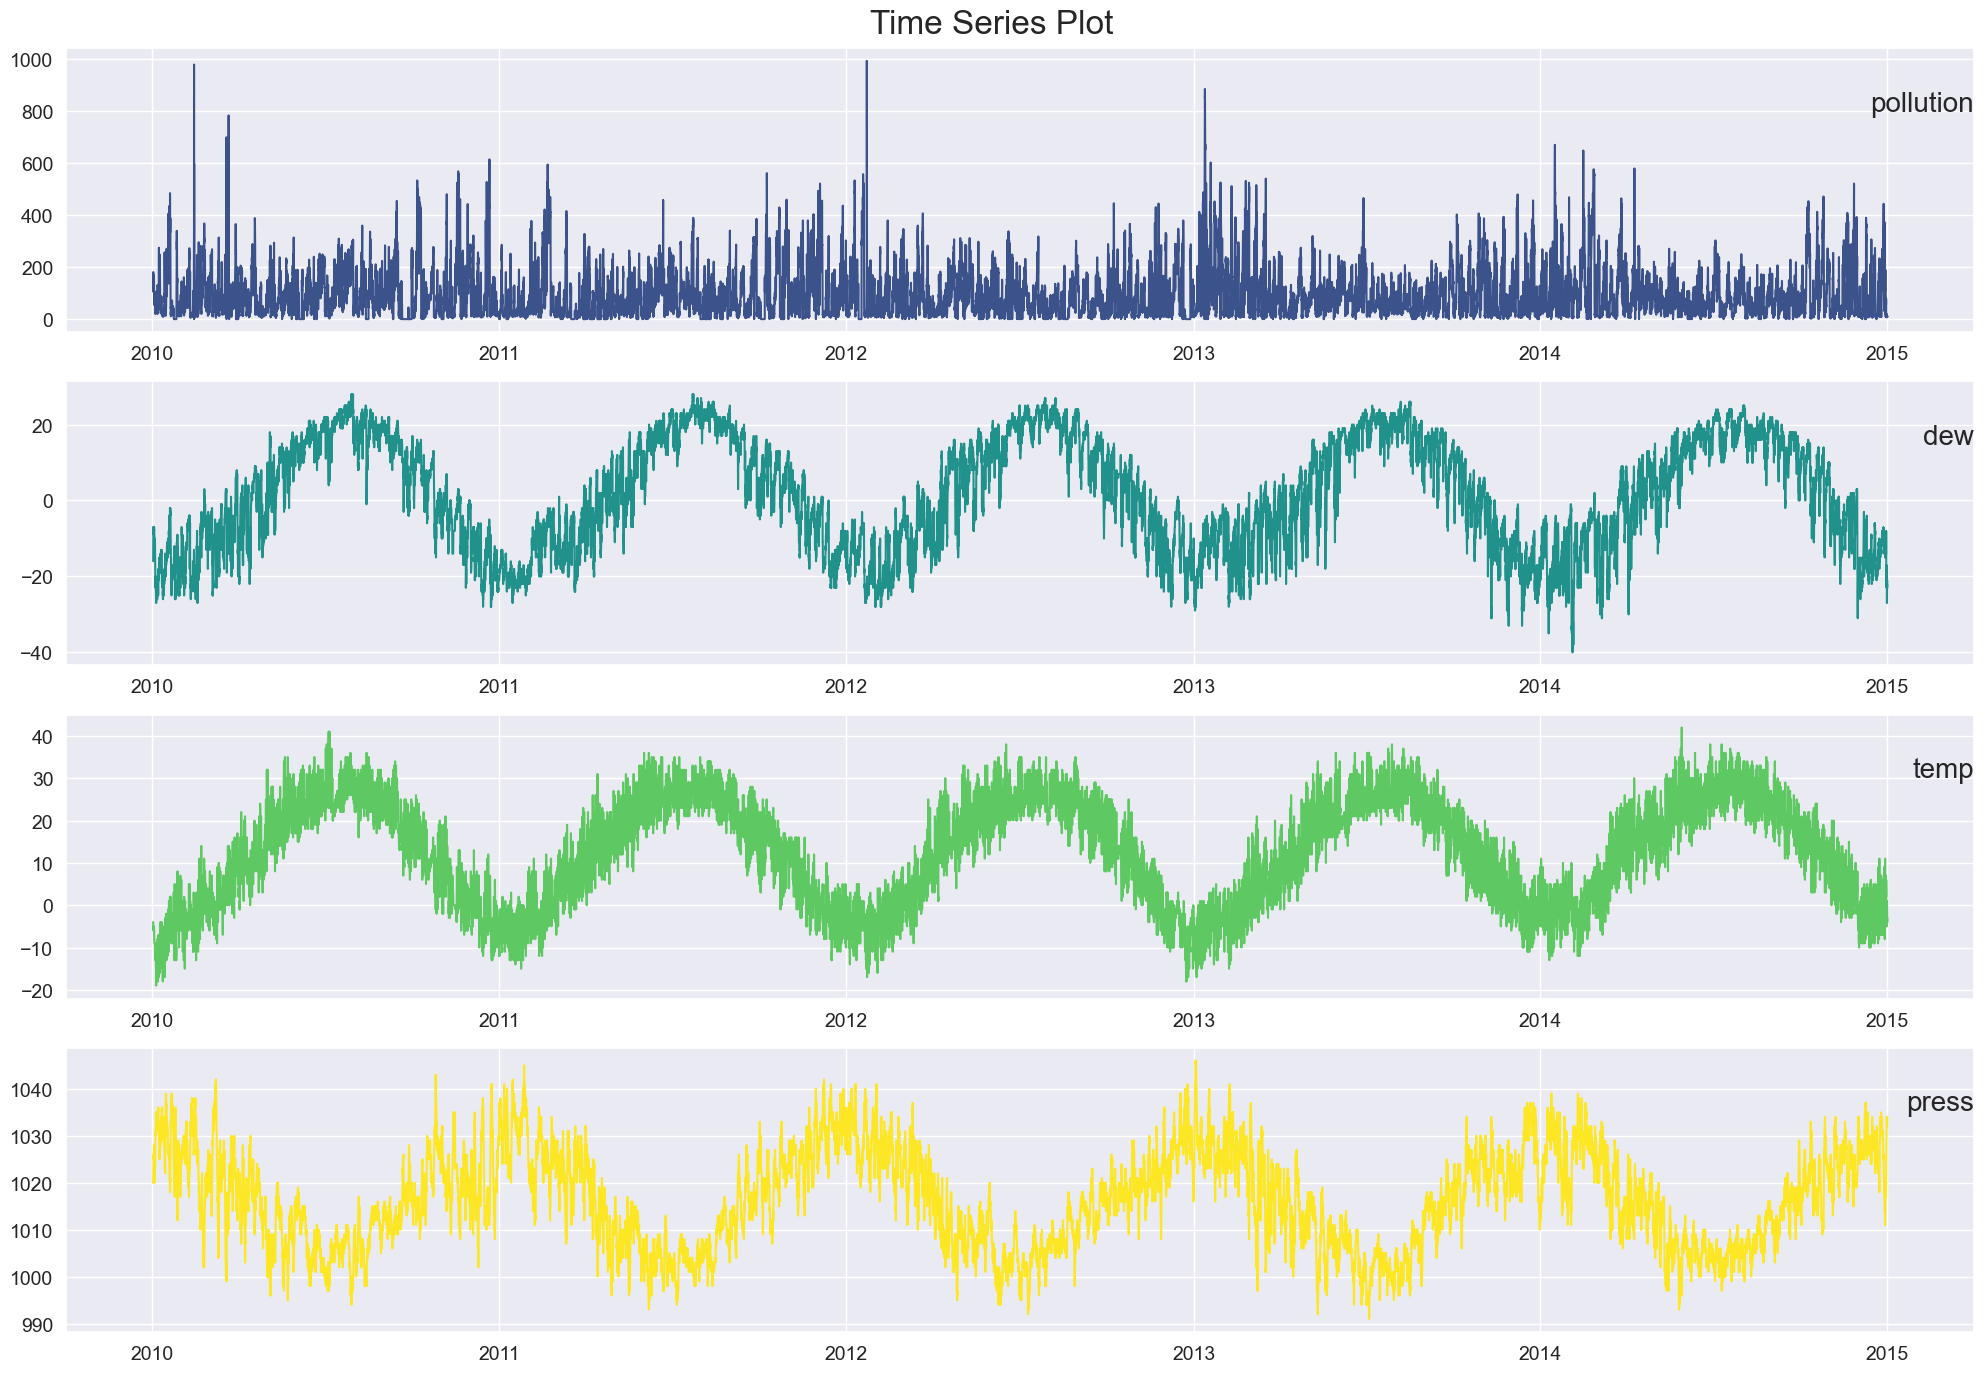

In [9]:
time_vals = ['pollution', 'dew',	'temp',	'press']
fig, axs = plt.subplots(len(time_vals), 1, figsize=(20, 14), facecolor='white')
i = 1
for col, ax in zip(time_vals, axs):
    ax.plot(df['date'], df[col].values, color=cm.viridis(i/len(time_vals)))
    ax.set_title(col, y=0.75, loc='right', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.grid(True)
    i += 1

plt.suptitle('Time Series Plot', fontsize=24)
plt.tight_layout()
plt.show()

In [10]:
print(
    f"Snow>0: {df[df['snow'] > 0].shape}",
    f"Rain>0: {df[df['rain'] > 0].shape}",
    sep='\n')

Snow>0: (368, 9)
Rain>0: (1808, 9)


In [11]:
df['rain'] = df['rain'].apply(lambda x: 1 if x > 0 else 0)
df['snow'] = df['snow'].apply(lambda x: 1 if x > 0 else 0)

In [12]:
df['wnd_spd'] = np.log(df['wnd_spd'])

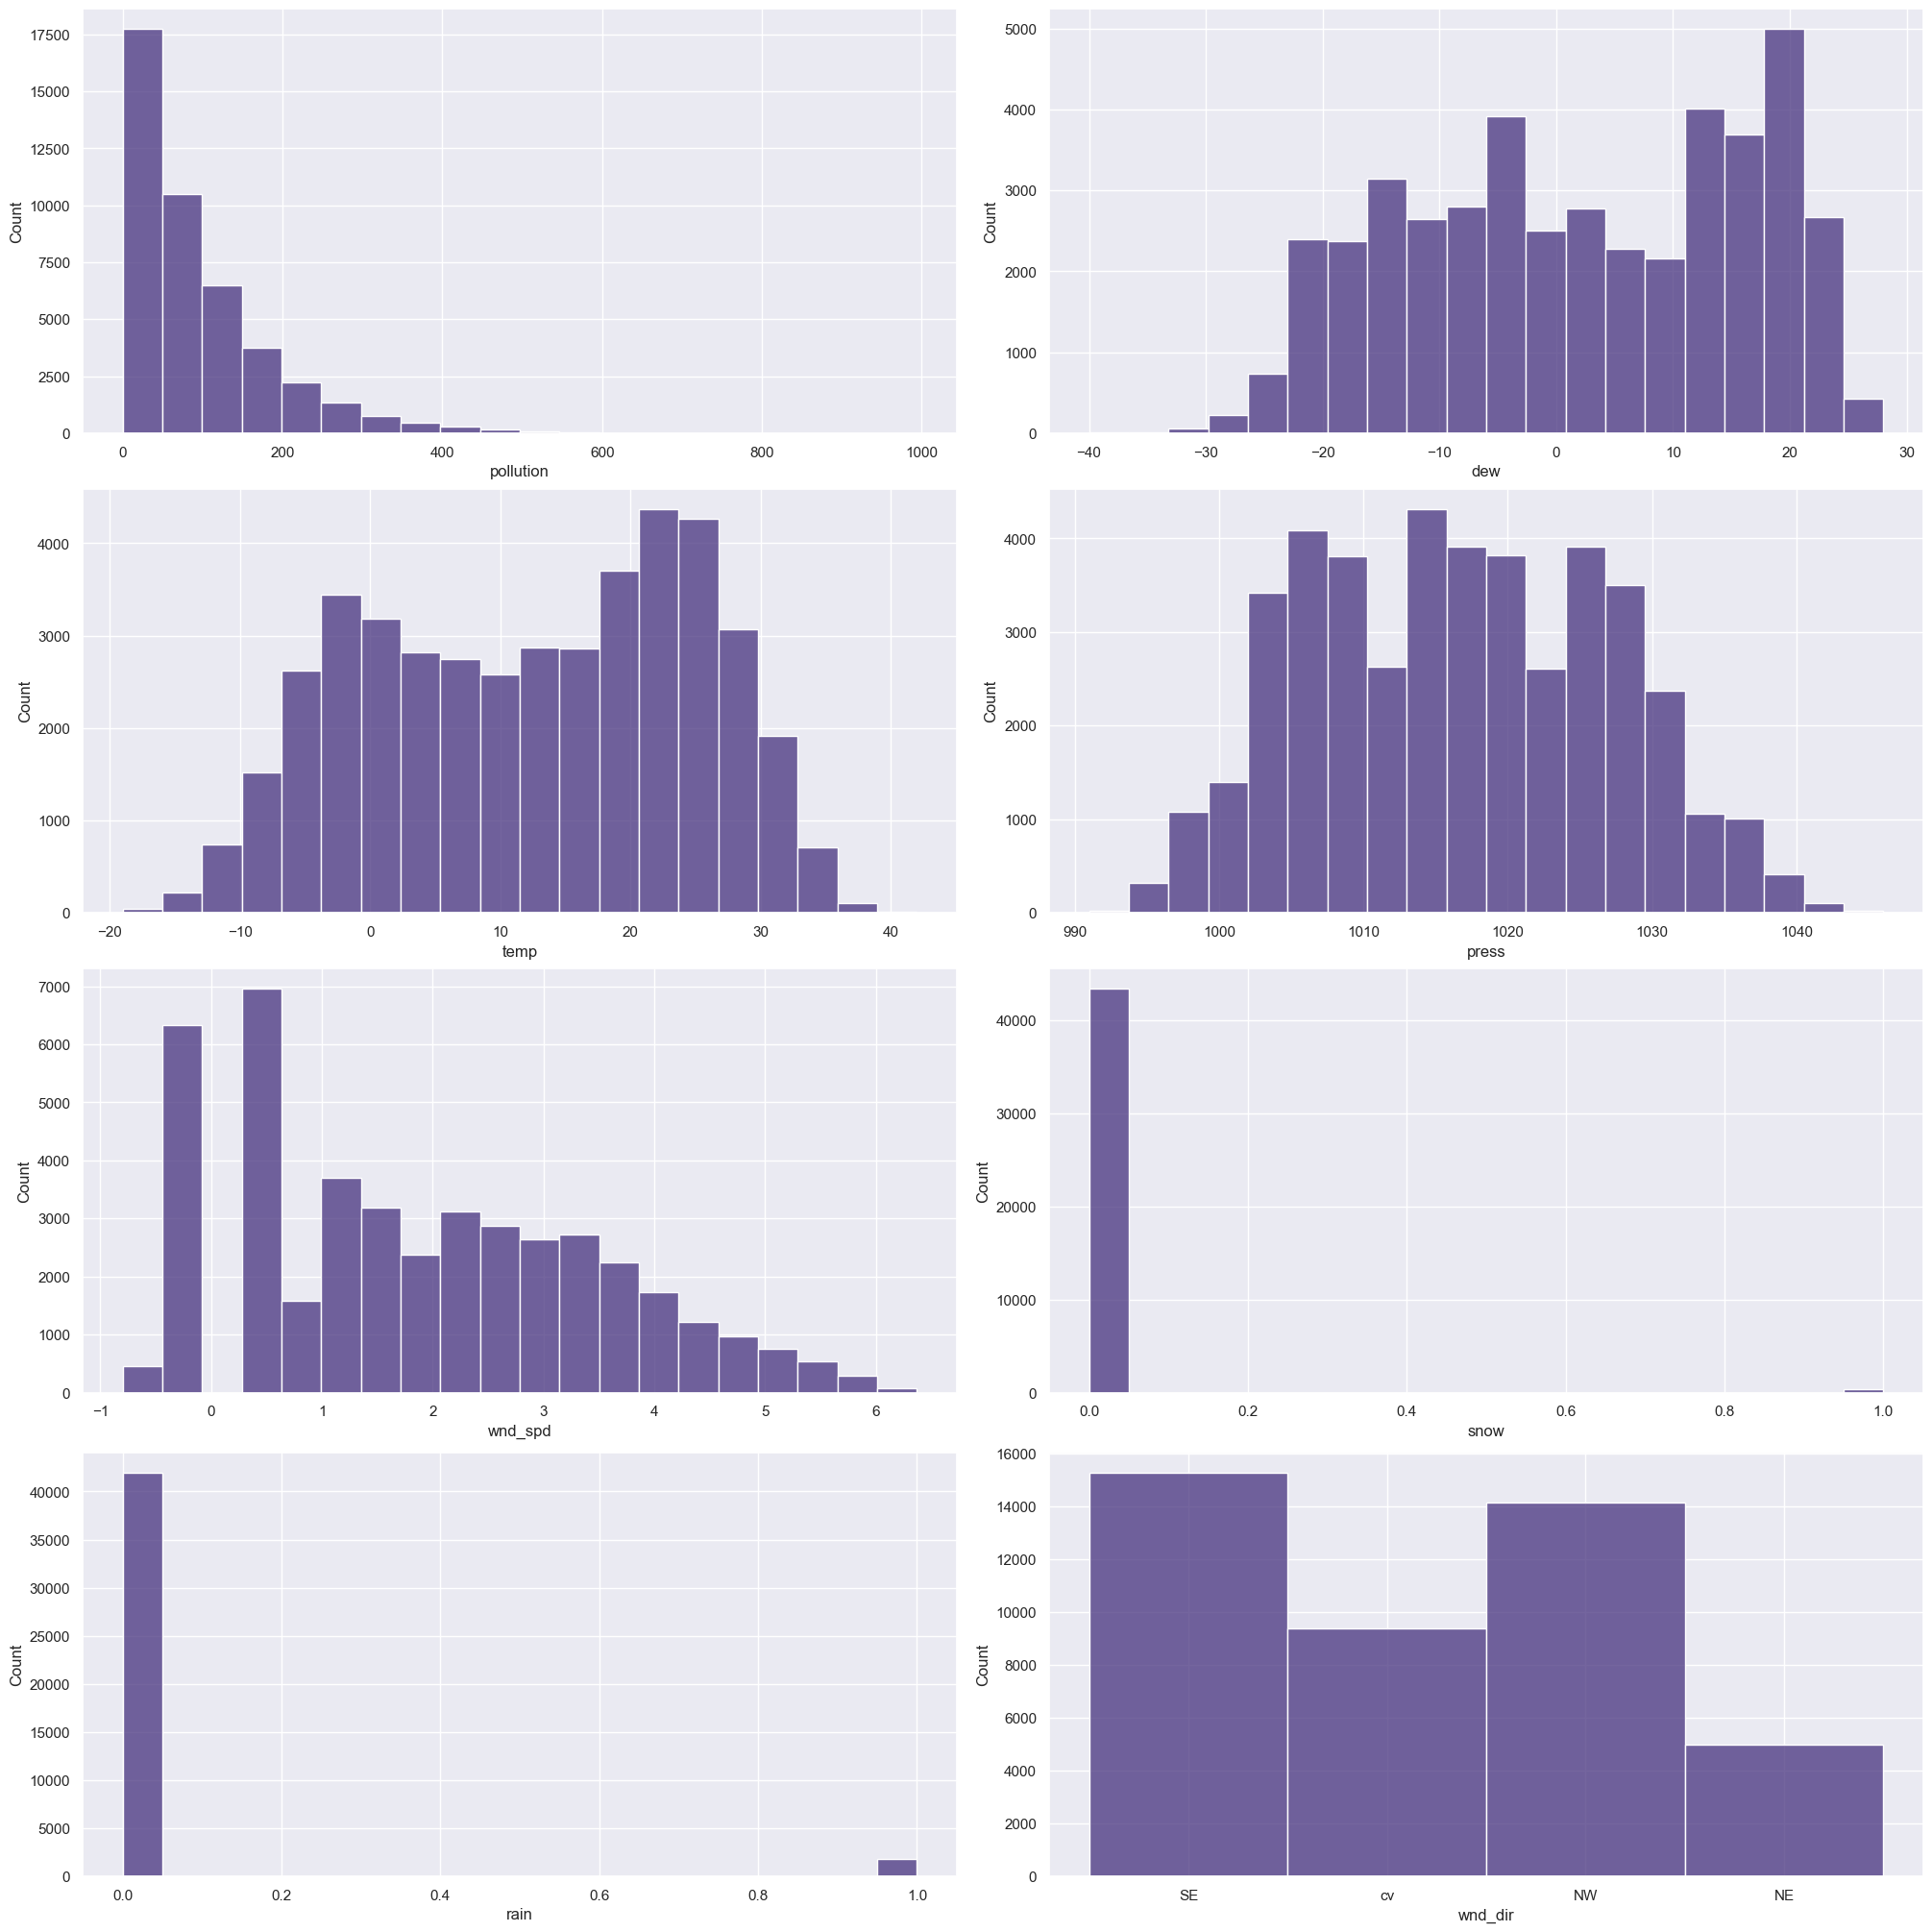

In [13]:
numerical = ['pollution',	'dew',	'temp',	'press', 'wnd_spd', 'snow', 'rain']
fig, axs = plt.subplots(4, 2,
                        figsize=(20, 20), constrained_layout=True)

for i, f in enumerate(numerical):
    sns.histplot(x=f, data=df,
                 ax=axs[i//2][i % 2], bins=20,
                 palette=sns.color_palette("viridis", 2))
sns.histplot(x='wnd_dir', data=df)

plt.show()

In [14]:
df = pd.get_dummies(
    data=df, columns=['wnd_dir'])
df.head()

,date,pollution,dew,temp,press,wnd_spd,snow,rain,wnd_dir_NE,wnd_dir_NW,wnd_dir_SE,wnd_dir_cv
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,0.582216,0,0,False,False,True,False
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,0.985817,0,0,False,False,True,False
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,1.272566,0,0,False,False,True,False
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,1.678964,1,0,False,False,True,False
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,1.832581,1,0,False,False,True,False


In [15]:
df_test = pd.read_csv("pollution_test_data1.csv")
df_test['rain'] = df_test['rain'].apply(lambda x: 1 if x > 0 else 0)
df_test['snow'] = df_test['snow'].apply(lambda x: 1 if x > 0 else 0)
df_test['wnd_spd'] = np.log(df_test['wnd_spd'])
df_test = pd.get_dummies(
    data=df_test, columns=['wnd_dir'])
df_test.head()

,dew,temp,press,wnd_spd,snow,rain,pollution,wnd_dir_NE,wnd_dir_NW,wnd_dir_SE,wnd_dir_cv
0,-16,4,1027,1.275363,0,0,128,False,False,True,False
1,-17,5,1027,2.028148,0,0,77,False,False,True,False
2,-16,4,1027,2.239645,0,0,65,False,False,True,False
3,-16,1,1028,-0.116534,0,0,79,False,False,False,True
4,-14,0,1028,0.582216,0,0,93,True,False,False,False


In [16]:
scaler = MinMaxScaler()
columns = (['pollution', 'dew', 'temp', 'press', "wnd_dir_NE", "wnd_dir_NW",	"wnd_dir_SE",	"wnd_dir_cv", 'wnd_spd',
            'snow', 'rain'])

df_train_scaled = df.copy()
df_test_scaled = df_test.copy()

df_train_scaled[columns] = scaler.fit_transform(df_train_scaled[columns])
df_test_scaled[columns] = scaler.transform(df_test_scaled[columns])

df_train_scaled.head()

,date,pollution,dew,temp,press,wnd_spd,snow,rain,wnd_dir_NE,wnd_dir_NW,wnd_dir_SE,wnd_dir_cv
0,2010-01-02 00:00:00,0.129779,0.352941,0.245902,0.527273,0.192539,0.0,0.0,0.0,0.0,1.0,0.0
1,2010-01-02 01:00:00,0.148893,0.367647,0.245902,0.527273,0.248820,0.0,0.0,0.0,0.0,1.0,0.0
2,2010-01-02 02:00:00,0.159960,0.426471,0.229508,0.545455,0.288807,0.0,0.0,0.0,0.0,1.0,0.0
3,2010-01-02 03:00:00,0.182093,0.485294,0.229508,0.563636,0.345478,1.0,0.0,0.0,0.0,1.0,0.0
4,2010-01-02 04:00:00,0.138833,0.485294,0.229508,0.563636,0.366899,1.0,0.0,0.0,0.0,1.0,0.0


In [17]:
df_test_scaled.head()

,dew,temp,press,wnd_spd,snow,rain,pollution,wnd_dir_NE,wnd_dir_NW,wnd_dir_SE,wnd_dir_cv
0,0.352941,0.377049,0.654545,0.289197,0.0,0.0,0.128773,0.0,0.0,1.0,0.0
1,0.338235,0.393443,0.654545,0.394171,0.0,0.0,0.077465,0.0,0.0,1.0,0.0
2,0.352941,0.377049,0.654545,0.423664,0.0,0.0,0.065392,0.0,0.0,1.0,0.0
3,0.352941,0.327869,0.672727,0.095100,0.0,0.0,0.079477,0.0,0.0,0.0,1.0
4,0.382353,0.311475,0.672727,0.192539,0.0,0.0,0.093561,1.0,0.0,0.0,0.0


In [18]:
df_train_scaled.drop(columns=["date"], inplace=True)

In [19]:
df_train_scaled.columns

Index(['pollution', 'dew', 'temp', 'press', 'wnd_spd', 'snow', 'rain',
       'wnd_dir_NE', 'wnd_dir_NW', 'wnd_dir_SE', 'wnd_dir_cv'],
      dtype='object')

In [20]:
df_test_scaled = df_test_scaled.reindex(columns=df_train_scaled.columns)

In [21]:
# Define the window size
window_size = 11

# -------------------------TrainSet---------------------------------

# Initialize empty lists to store X and Y
X_sequences = []
Y_values = []

df_train_scaled_data = df_train_scaled.drop(columns=["pollution"])
# Iterate through the DataFrame to create sequences
for i in range(len(df_train_scaled) - window_size):
    Y_val = df_train_scaled.iloc[i+window_size]['pollution']
    X_seq = df_train_scaled_data.iloc[i:i+window_size].values
    X_sequences.append(X_seq)
    Y_values.append(Y_val)

# Convert the lists to NumPy arrays for modeling
X_train = np.array(X_sequences)
y_train = np.array(Y_values)

# -------------------------TestSet---------------------------------

# Initialize empty lists to store X and Y
X_sequences = []
Y_values = []

df_test_scaled_data = df_test_scaled.drop(columns=["pollution"])
# Iterate through the DataFrame to create sequences
for i in range(len(df_test_scaled) - window_size):
    X_seq = df_test_scaled_data.iloc[i:i+window_size].values
    Y_val = df_test_scaled.iloc[i+window_size]['pollution']
    X_sequences.append(X_seq)
    Y_values.append(Y_val)

# Convert the lists to NumPy arrays for modeling
X_test = np.array(X_sequences)
y_test = np.array(Y_values)

# -----------------------------------------------------------------
print("Train size : ", X_train.shape, y_train.shape, "\n ------- \n"
      "Test Size : ", X_test.shape, y_test.shape)

Train size :  (43789, 11, 10) (43789,) 
 ------- 
Test Size :  (335, 11, 10) (335,)


In [22]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout, BatchNormalization, Conv1D, MaxPooling1D, GRU
from sklearn.metrics import mean_squared_error as mse
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam, Nadam, SGD, Adamax
import sklearn.metrics as metrics

In [23]:
def plot_train_history(history):
    plt.figure(figsize=(15, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [24]:
all_results = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'R2', 'MSE'])

In [25]:
def test_model(model, model_name, X_test, y_test, end=-1):
    X_test = X_test[:end]
    y_test = y_test[:end]
    y_pred = model.predict(X_test).flatten()
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    mae = metrics.mean_absolute_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    all_results.loc[len(all_results)] = [model_name, rmse, mae, r2, mse]

    plt.figure(figsize=(15, 6))
    plt.plot(y_test, label='True')
    plt.plot(y_pred, label='Predicted')
    plt.title(f'{model_name} Predictions')
    plt.legend()
    plt.show()

    display(all_results[-1:])

In [26]:
# Define callbacks for avoiding overfitting
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint(
    'best_model.keras', monitor='val_loss', save_best_only=True)

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(
        X_train.shape[1], X_train.shape[2]), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(16, return_sequences=False),
    tf.keras.layers.Dense(1)
])
model.compile(
    loss=tf.losses.MeanSquaredError(),
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.metrics.RootMeanSquaredError()]
)
model.summary()
history = model.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 11, 32)         │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,657 (33.82 KB)

 Trainable params: 8,657 (33.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0079 - root_mean_squared_error: 0.0876 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0713
Epoch 2/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0056 - root_mean_squared_error: 0.0751 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0708
Epoch 3/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0055 - root_mean_squared_error: 0.0742 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0684
Epoch 4/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0053 - root_mean_squared_error: 0.0727 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0677
Epoch 5/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0050 - root_mean_squared_error: 0.0705 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0706
Epoch 6/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0051 - root_mean_squared_error: 0.0712 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0683
Epoch 7/10
1232/1232 ━━━━━━━━━━━━━━━━━━━

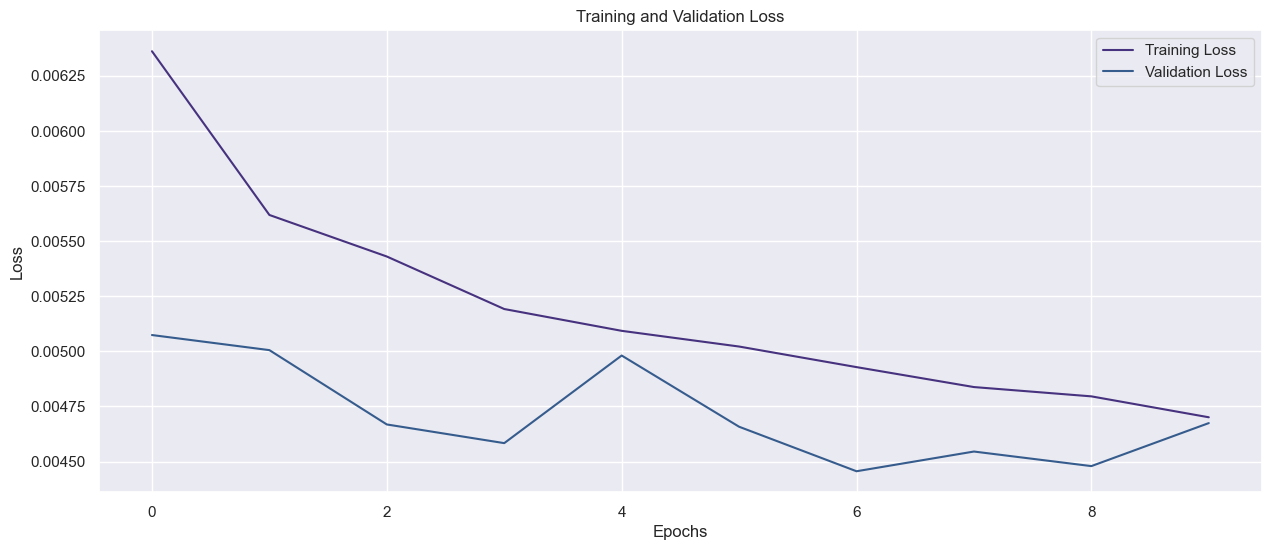

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


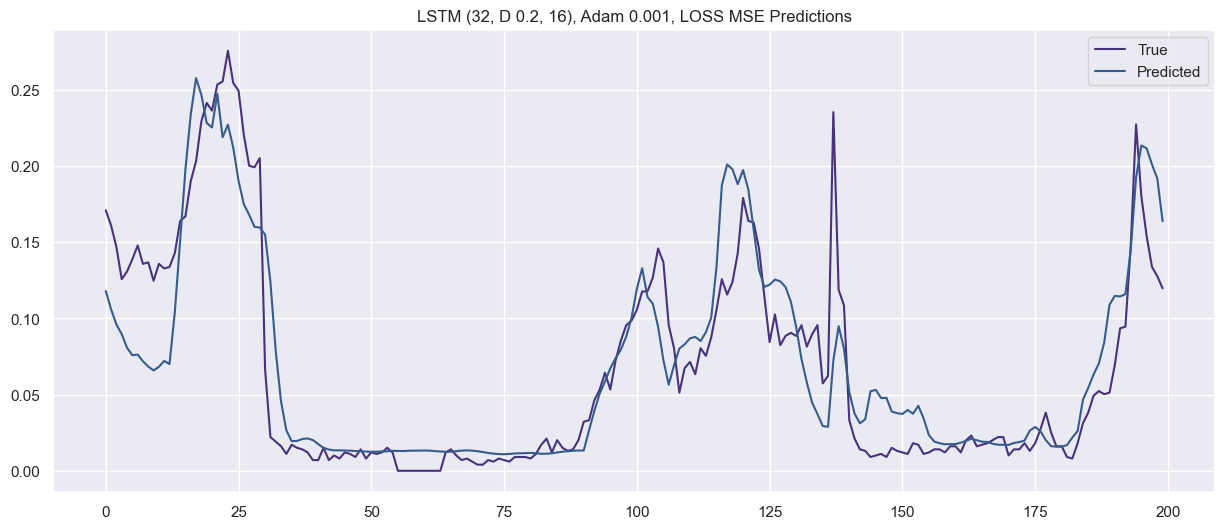

,Model,RMSE,MAE,R2,MSE
0,"LSTM (32, D 0.2, 16), Adam 0.001, LOSS MSE",0.032232,0.022006,0.78741,0.001039


In [28]:
plot_train_history(history)
best_model = tf.keras.models.load_model('best_model.keras')
test_model(best_model, 'LSTM (32, D 0.2, 16), Adam 0.001, LOSS MSE',
           X_test, y_test, 200)

In [29]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
y_pred = best_model.predict(X_test)
y_pred = y_pred.flatten()
print("MSE: ", mse(y_test, y_pred))
print("RMSE: ", np.sqrt(mse(y_test, y_pred)))
print("R2: ", r2_score(y_test.flatten(), y_pred))

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE:  0.005065199130114283
RMSE:  0.0711702123792973
R2:  0.4867178170288805


In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(
        X_train.shape[1], X_train.shape[2]), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(16, return_sequences=False),
    tf.keras.layers.Dense(1)
])
model.compile(
    loss=tf.losses.MeanSquaredError(),
    optimizer=tf.optimizers.Adam(learning_rate=0.0002),
    metrics=[tf.metrics.RootMeanSquaredError()]
)
model.summary()
history = model.fit(X_train, y_train,
                    epochs=20, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 11, 32)         │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,657 (33.82 KB)

 Trainable params: 8,657 (33.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0075 - root_mean_squared_error: 0.0862 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0736
Epoch 2/20
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0060 - root_mean_squared_error: 0.0776 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0719
Epoch 3/20
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0058 - root_mean_squared_error: 0.0762 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0719
Epoch 4/20
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0057 - root_mean_squared_error: 0.0753 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0721
Epoch 5/20
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0056 - root_mean_squared_error: 0.0748 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0695
Epoch 6/20
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0054 - root_mean_squared_error: 0.0736 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0710
Epoch 7/20
1232/1232 ━━━━━━━━━━━━━━━━━━━

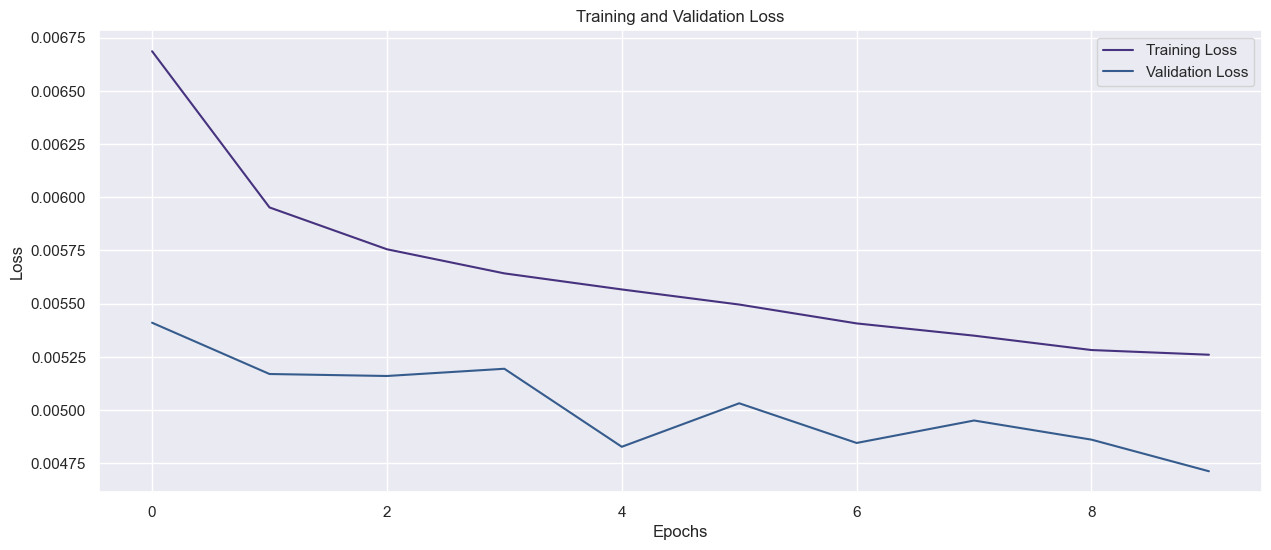

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


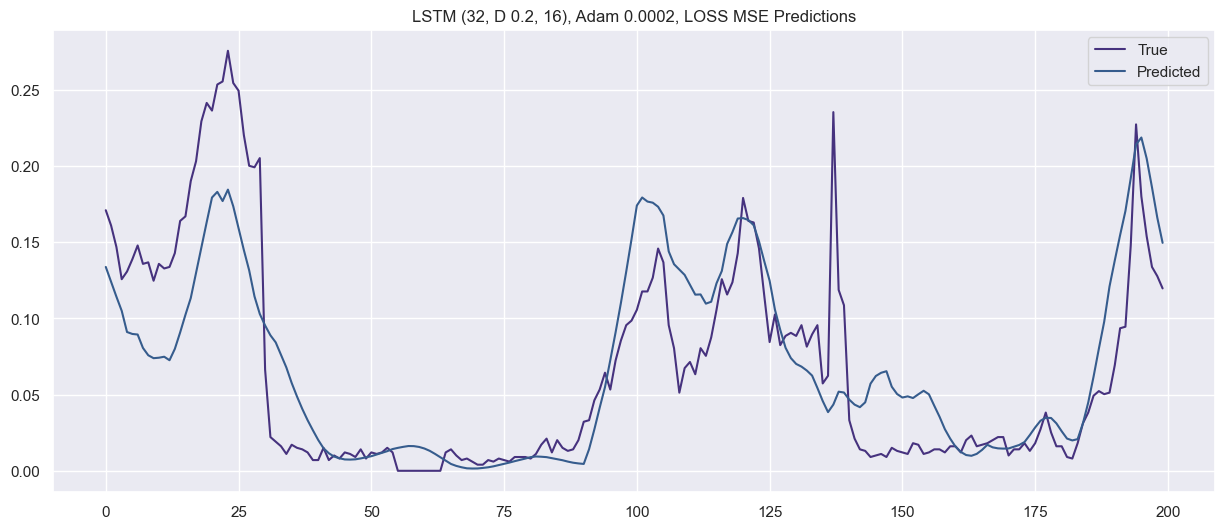

,Model,RMSE,MAE,R2,MSE
1,"LSTM (32, D 0.2, 16), Adam 0.0002, LOSS MSE",0.04012,0.029067,0.670622,0.00161


In [31]:
plot_train_history(history)
test_model(model, 'LSTM (32, D 0.2, 16), Adam 0.0002, LOSS MSE',
           X_test, y_test, 200)

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.GRU(32, input_shape=(
        X_train.shape[1], X_train.shape[2]), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(16, return_sequences=False),
    tf.keras.layers.Dense(1)
])
model.compile(
    loss=tf.losses.MeanSquaredError(),
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.metrics.RootMeanSquaredError()]
)
model.summary()
history = model.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 11, 32)         │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 11, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 16)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,641 (25.94 KB)

 Trainable params: 6,641 (25.94 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0080 - root_mean_squared_error: 0.0887 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0740
Epoch 2/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0058 - root_mean_squared_error: 0.0761 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0714
Epoch 3/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0054 - root_mean_squared_error: 0.0736 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0731
Epoch 4/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0053 - root_mean_squared_error: 0.0726 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0691
Epoch 5/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0053 - root_mean_squared_error: 0.0731 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0666
Epoch 6/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0051 - root_mean_squared_error: 0.0717 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0676
Epoch 7/10
1232/1232 ━━━━━━━━━━━━━━━━━━━

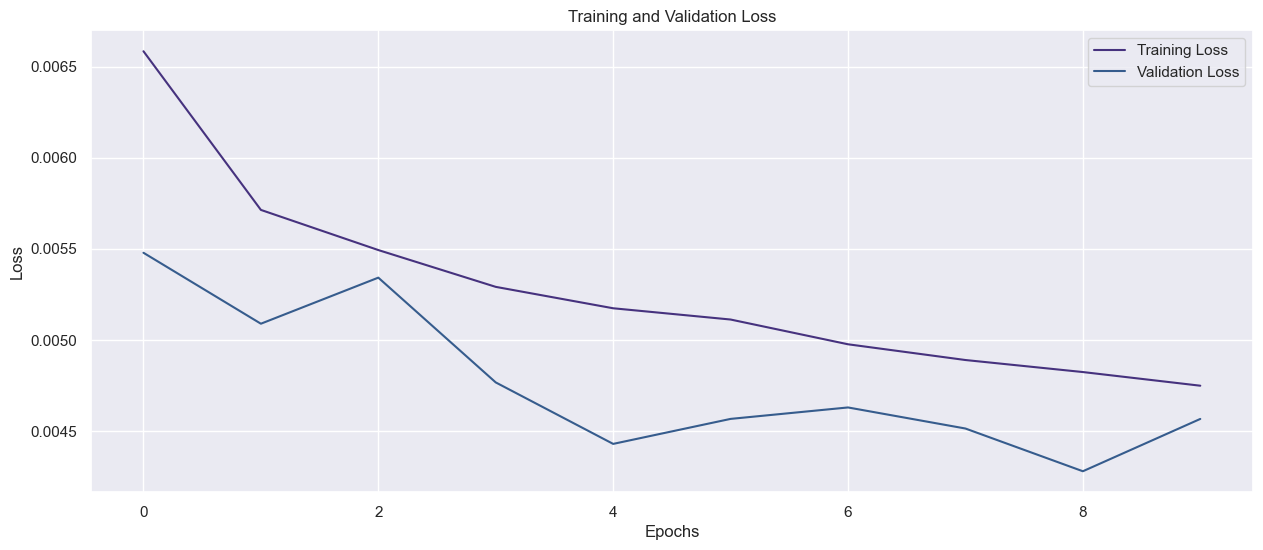

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


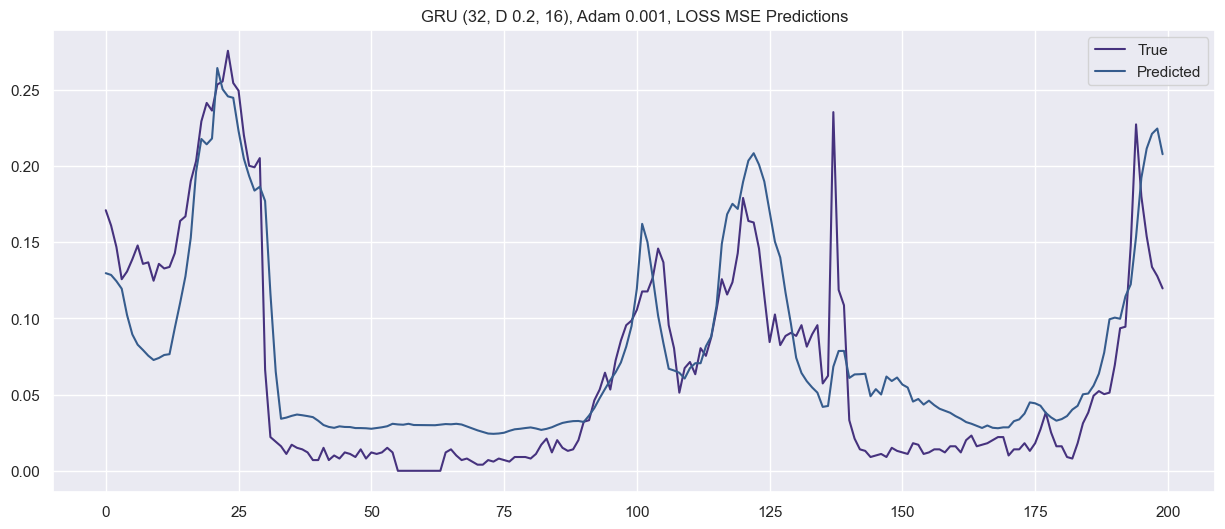

,Model,RMSE,MAE,R2,MSE
2,"GRU (32, D 0.2, 16), Adam 0.001, LOSS MSE",0.035233,0.027673,0.745978,0.001241


In [33]:
plot_train_history(history)
best_model = tf.keras.models.load_model('best_model.keras')
test_model(best_model, 'GRU (32, D 0.2, 16), Adam 0.001, LOSS MSE',
           X_test, y_test, 200)

In [34]:
best_model = load_model('best_model.keras')
test_predictions = best_model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Train Predictions': test_predictions,
                                  'Actual': y_test.flatten()})
test_results.head()

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


,Train Predictions,Actual
0,0.129707,0.171026
1,0.128543,0.160966
2,0.124484,0.146881
3,0.119513,0.125755
4,0.102278,0.130785


In [35]:
from sklearn.metrics import r2_score, mean_absolute_error

print("R2 Score : ", r2_score(
    test_results['Actual'][:1000], test_results['Train Predictions'][:1000]))
print("MAE : ", mean_absolute_error(
    test_results['Actual'], test_results['Train Predictions']))

R2 Score :  0.5343985778019125
MAE :  0.04386198276685714


In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(
        X_train.shape[1], X_train.shape[2]), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(16, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(8, return_sequences=True),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.losses.MeanSquaredError(),
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.metrics.RootMeanSquaredError()]
)
model.summary()
history = model.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 11, 32)         │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 11, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 11, 16)         │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 11, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 11, 8)          │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11, 1)          │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,449 (36.91 KB)

 Trainable params: 9,449 (36.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0089 - root_mean_squared_error: 0.0945 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0895
Epoch 2/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0088 - root_mean_squared_error: 0.0938 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0905
Epoch 3/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0089 - root_mean_squared_error: 0.0942 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0895
Epoch 4/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0088 - root_mean_squared_error: 0.0940 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0900
Epoch 5/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0087 - root_mean_squared_error: 0.0930 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0898
Epoch 6/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0086 - root_mean_squared_error: 0.0927 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0894
Epoch 7/10
1232/1232 ━━━━━━━━━━━━━━━━━━━

In [37]:
best_model = load_model('best_model.keras')
test_predictions = best_model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Train Predictions': test_predictions,
                                  'Actual': y_test.flatten()})
test_results.head()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


,Train Predictions,Actual
0,0.129707,0.171026
1,0.128543,0.160966
2,0.124484,0.146881
3,0.119513,0.125755
4,0.102278,0.130785


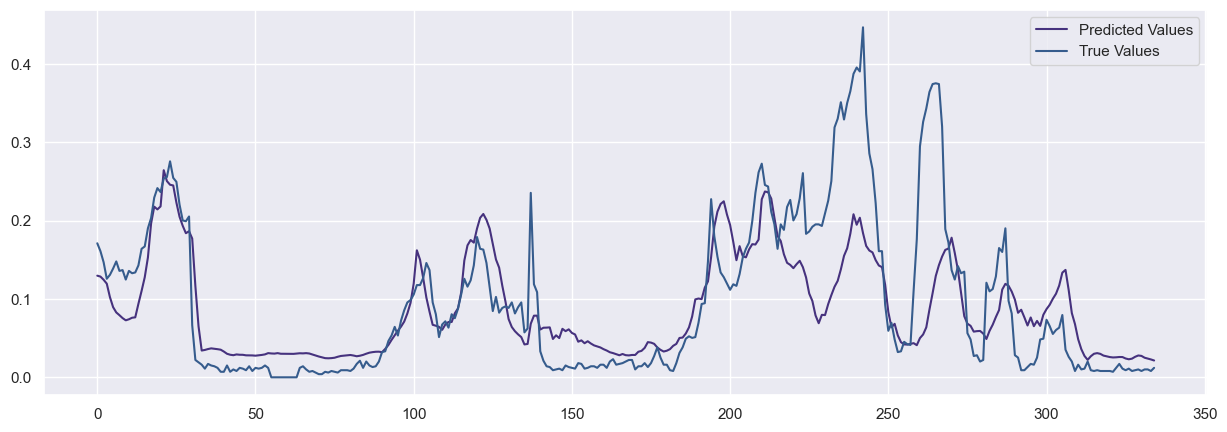

In [38]:
plt.figure(figsize=(15, 5))

plt.plot(test_results['Train Predictions'][:], label='Predicted Values')
plt.plot(test_results['Actual'][:], label='True Values')
plt.legend()

plt.show()

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu',
                           input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32, input_shape=(
        X_train.shape[1], X_train.shape[2]), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(16, return_sequences=False),
    tf.keras.layers.Dense(1)
])
model.compile(
    loss=tf.losses.MeanSquaredError(),
    optimizer=tf.optimizers.Adam(learning_rate=0.0007),
    metrics=[tf.metrics.RootMeanSquaredError()]
)
model.summary()
history = model.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 9, 64)          │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 4, 32)          │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,553 (68.57 KB)

 Trainable params: 17,553 (68.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0070 - root_mean_squared_error: 0.0836 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0732
Epoch 2/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0059 - root_mean_squared_error: 0.0768 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0725
Epoch 3/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0056 - root_mean_squared_error: 0.0752 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0720
Epoch 4/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0053 - root_mean_squared_error: 0.0729 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0706
Epoch 5/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0054 - root_mean_squared_error: 0.0734 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0700
Epoch 6/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0052 - root_mean_squared_error: 0.0718 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0700
Epoch 7/10
1232/1232 ━━━━━━━━━━━━━━━━━━━

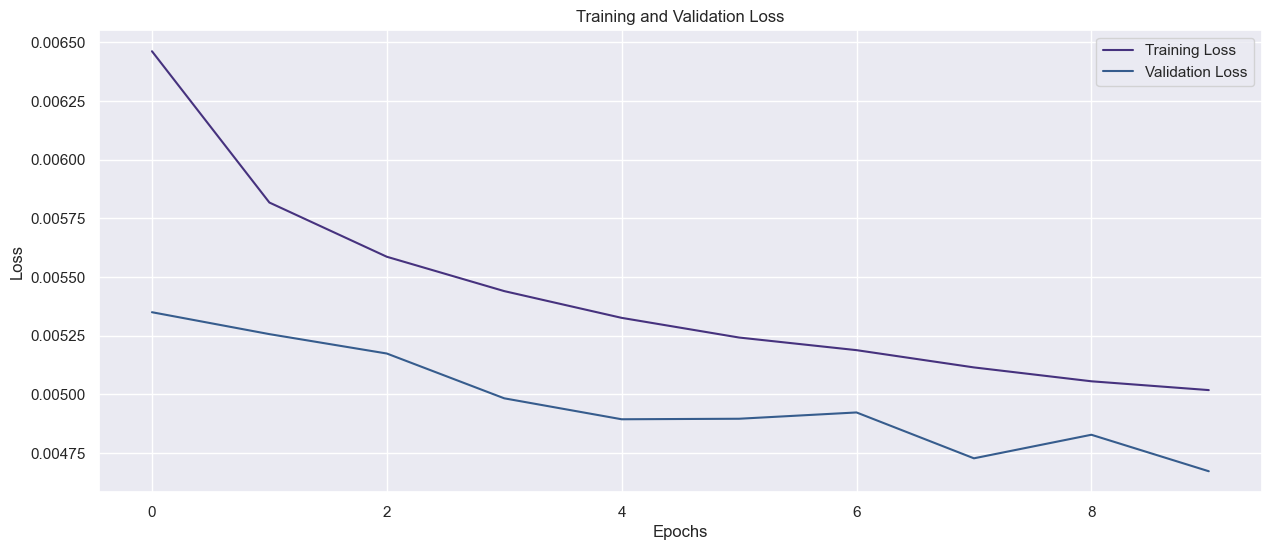

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


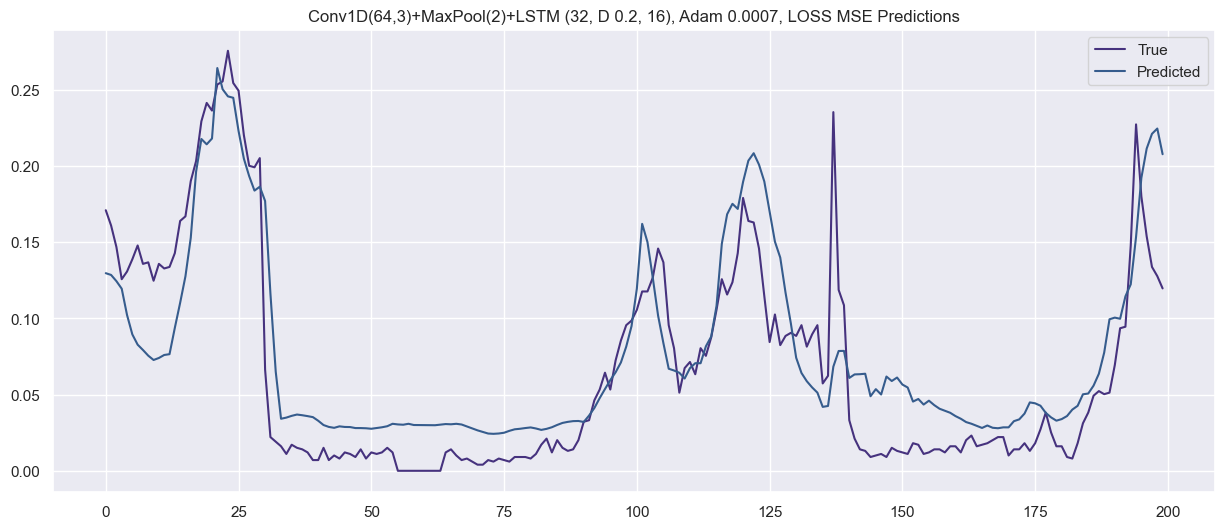

,Model,RMSE,MAE,R2,MSE
3,"Conv1D(64,3)+MaxPool(2)+LSTM (32, D 0.2, 16), ...",0.035233,0.027673,0.745978,0.001241


In [40]:
plot_train_history(history)
best_model = tf.keras.models.load_model('best_model.keras')
test_model(best_model, 'Conv1D(64,3)+MaxPool(2)+LSTM (32, D 0.2, 16), Adam 0.0007, LOSS MSE',
           X_test, y_test, 200)

In [41]:
best_model = load_model('best_model.keras')
test_predictions = best_model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Train Predictions': test_predictions,
                                  'Actual': y_test.flatten()})
test_results.head()

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


,Train Predictions,Actual
0,0.129707,0.171026
1,0.128543,0.160966
2,0.124484,0.146881
3,0.119513,0.125755
4,0.102278,0.130785


In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu',
                           input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32, input_shape=(
        X_train.shape[1], X_train.shape[2]), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(16, return_sequences=False),
    tf.keras.layers.Dense(1)
])
model.compile(
    loss=tf.losses.BinaryCrossentropy(),
    optimizer=tf.optimizers.Adam(learning_rate=0.0007),
    metrics=[tf.metrics.RootMeanSquaredError()]
)
model.summary()
history = model.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 9, 64)          │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 4, 32)          │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,553 (68.57 KB)

 Trainable params: 17,553 (68.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4243 - root_mean_squared_error: 0.0998 - val_loss: 0.2880 - val_root_mean_squared_error: 0.0757
Epoch 2/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2984 - root_mean_squared_error: 0.0783 - val_loss: 0.2848 - val_root_mean_squared_error: 0.0723
Epoch 3/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2960 - root_mean_squared_error: 0.0757 - val_loss: 0.2844 - val_root_mean_squared_error: 0.0721
Epoch 4/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2966 - root_mean_squared_error: 0.0755 - val_loss: 0.2843 - val_root_mean_squared_error: 0.0716
Epoch 5/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2975 - root_mean_squared_error: 0.0751 - val_loss: 0.2835 - val_root_mean_squared_error: 0.0703
Epoch 6/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2954 - root_mean_squared_error: 0.0737 - val_loss: 0.2831 - val_root_mean_squared_error: 0.0702
Epoch 7/10
1232/1232 ━━━━━━━━━━━━━━━━━━━

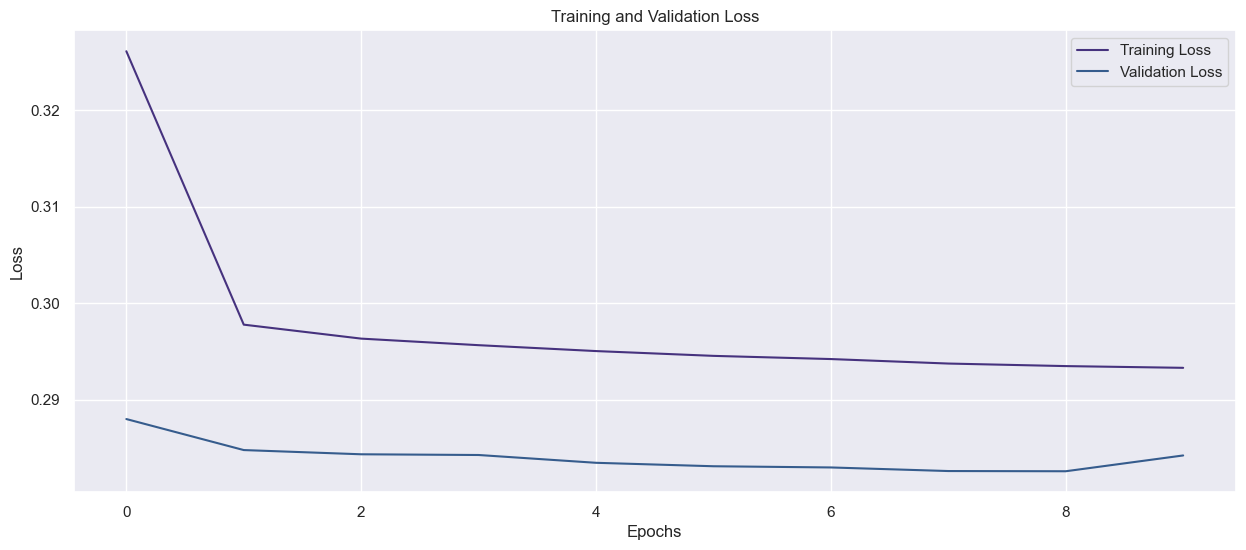

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


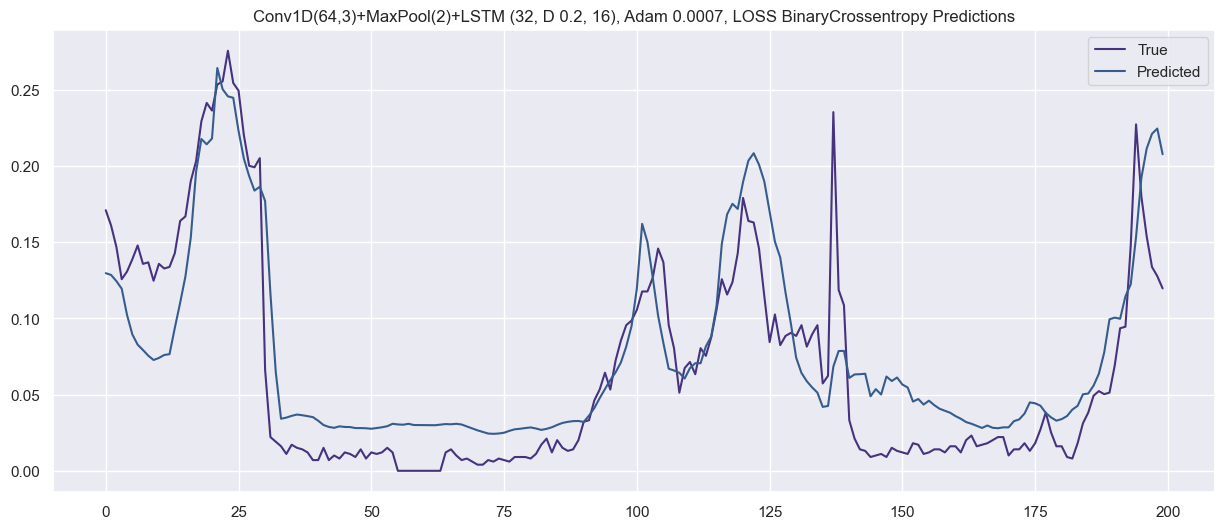

,Model,RMSE,MAE,R2,MSE
4,"Conv1D(64,3)+MaxPool(2)+LSTM (32, D 0.2, 16), ...",0.035233,0.027673,0.745978,0.001241


In [43]:
plot_train_history(history)
best_model = tf.keras.models.load_model('best_model.keras')
test_model(best_model, 'Conv1D(64,3)+MaxPool(2)+LSTM (32, D 0.2, 16), Adam 0.0007, LOSS BinaryCrossentropy',
           X_test, y_test, 200)

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu',
                           input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32, input_shape=(
        X_train.shape[1], X_train.shape[2]), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(16, return_sequences=False),
    tf.keras.layers.Dense(1)
])
model.compile(
    loss=tf.losses.CategoricalCrossentropy(),
    optimizer=tf.optimizers.Adam(learning_rate=0.0007),
    metrics=[tf.metrics.RootMeanSquaredError()]
)
model.summary()
history = model.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 9, 64)          │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 4, 32)          │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,553 (68.57 KB)

 Trainable params: 17,553 (68.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.1279e-08 - root_mean_squared_error: 0.1356 - val_loss: 1.0771e-08 - val_root_mean_squared_error: 0.1259
Epoch 2/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.1325e-08 - root_mean_squared_error: 0.1359 - val_loss: 1.0771e-08 - val_root_mean_squared_error: 0.1259
Epoch 3/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1349e-08 - root_mean_squared_error: 0.1357 - val_loss: 1.0771e-08 - val_root_mean_squared_error: 0.1259
Epoch 4/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1254e-08 - root_mean_squared_error: 0.1356 - val_loss: 1.0771e-08 - val_root_mean_squared_error: 0.1259
Epoch 5/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1199e-08 - root_mean_squared_error: 0.1347 - val_loss: 1.0771e-08 - val_root_mean_squared_error: 0.1259
Epoch 6/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1248e-08 - root_mean_squared_error: 0.1349 - val_loss: 1.0771e-08 - val_root_mean_squared_error:

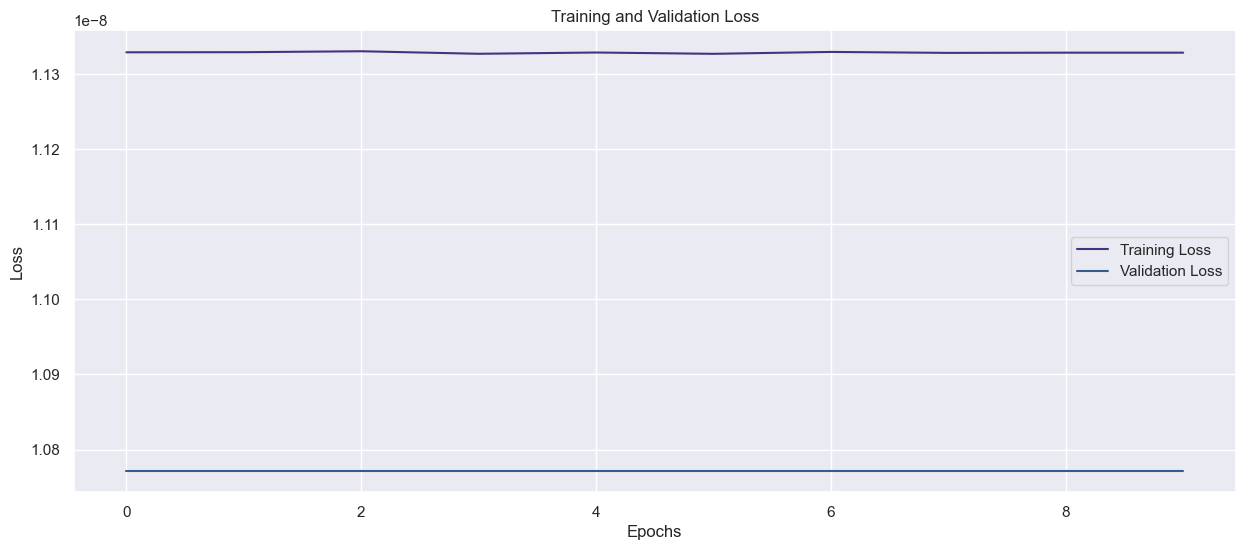

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


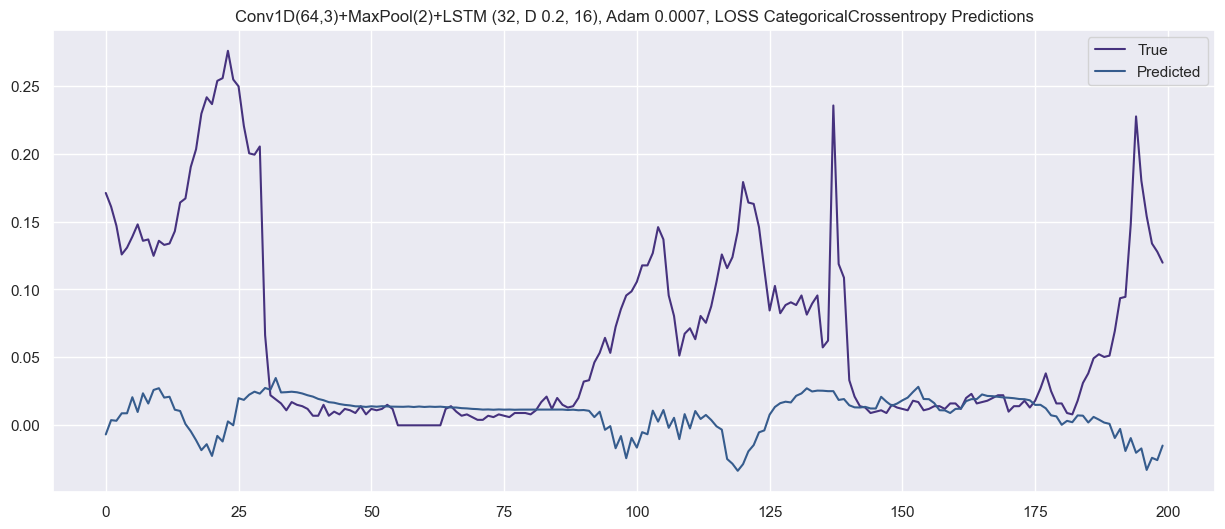

,Model,RMSE,MAE,R2,MSE
5,"Conv1D(64,3)+MaxPool(2)+LSTM (32, D 0.2, 16), ...",0.096411,0.062702,-0.902113,0.009295


In [45]:
plot_train_history(history)
best_model = tf.keras.models.load_model('best_model.keras')
test_model(best_model, 'Conv1D(64,3)+MaxPool(2)+LSTM (32, D 0.2, 16), Adam 0.0007, LOSS CategoricalCrossentropy',
           X_test, y_test, 200)

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(
        X_train.shape[1], X_train.shape[2]), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(16, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(8, return_sequences=True),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.losses.CosineSimilarity(),
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.metrics.RootMeanSquaredError()]
)
model.summary()
history = model.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                  │ (None, 11, 32)         │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 11, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 11, 16)         │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 11, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 11, 8)          │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11, 1)          │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,449 (36.91 KB)

 Trainable params: 9,449 (36.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: -3.7912 - root_mean_squared_error: 0.1104 - val_loss: -4.9188 - val_root_mean_squared_error: 0.1041
Epoch 2/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: -4.1194 - root_mean_squared_error: 0.1072 - val_loss: -4.9188 - val_root_mean_squared_error: 0.1029
Epoch 3/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: -4.1226 - root_mean_squared_error: 0.1056 - val_loss: -4.9188 - val_root_mean_squared_error: 0.1009
Epoch 4/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: -4.1132 - root_mean_squared_error: 0.1059 - val_loss: -4.9188 - val_root_mean_squared_error: 0.1028
Epoch 5/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: -4.1138 - root_mean_squared_error: 0.1052 - val_loss: -4.9188 - val_root_mean_squared_error: 0.1009
Epoch 6/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: -4.1247 - root_mean_squared_error: 0.1046 - val_loss: -4.9188 - val_root_mean_squared_error: 0.1005
Epoch 7/10
1232/1232 ━━━━━━━

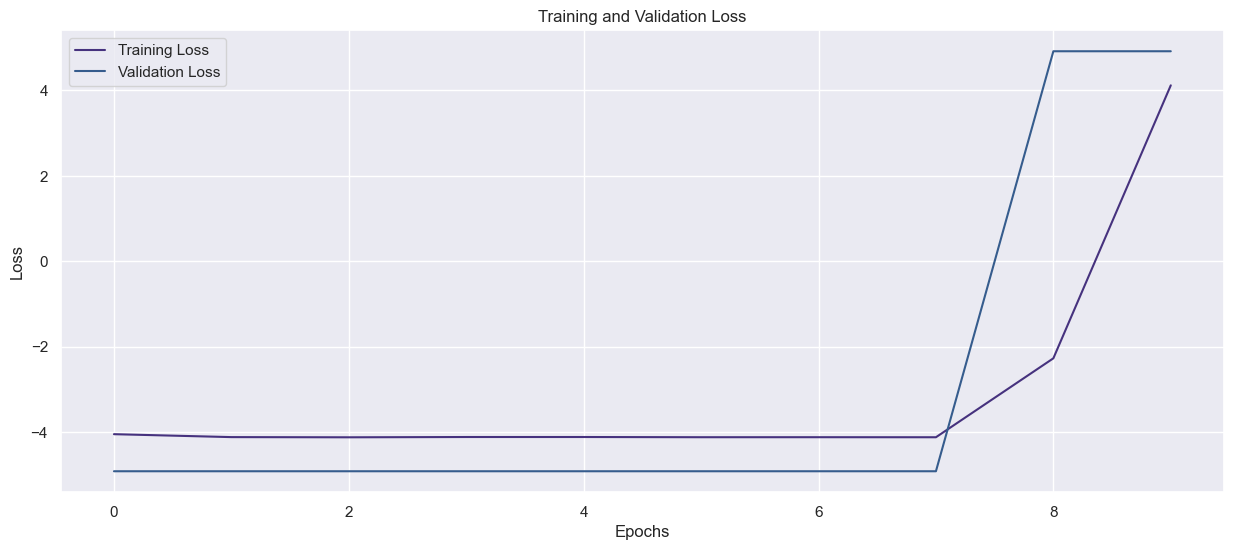

In [53]:
plot_train_history(history)

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(
        X_train.shape[1], X_train.shape[2]), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(16, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(8, return_sequences=True),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.losses.LogCosh(),
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.metrics.RootMeanSquaredError()]
)
model.summary()
history = model.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 11, 32)         │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 11, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 11, 16)         │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 11, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 11, 8)          │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 11, 1)          │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,449 (36.91 KB)

 Trainable params: 9,449 (36.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0045 - root_mean_squared_error: 0.0955 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0897
Epoch 2/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0043 - root_mean_squared_error: 0.0932 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0895
Epoch 3/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0043 - root_mean_squared_error: 0.0935 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0896
Epoch 4/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0043 - root_mean_squared_error: 0.0927 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0896
Epoch 5/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0043 - root_mean_squared_error: 0.0936 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0896
Epoch 6/10
1232/1232 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0043 - root_mean_squared_error: 0.0936 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0894
Epoch 7/10
1232/1232 ━━━━━━━━━━━━━━━━━━━

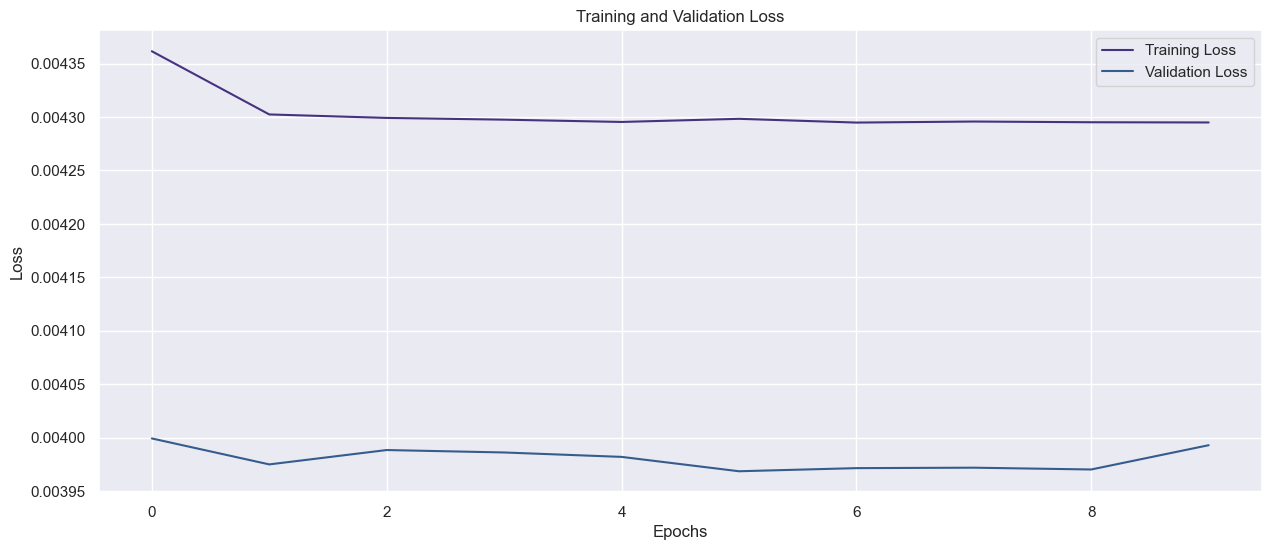

In [56]:
plot_train_history(history)